In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
data = pd.read_excel("C:\\Users\krish\OneDrive\Documents\Book1.xlsx")

In [12]:
print("Initial Dataset Shape:", data.shape)

Initial Dataset Shape: (0, 0)


In [19]:
data = data.dropna(subset=["CustomerID"])

KeyError: ['CustomerID']

In [18]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

KeyError: 'Quantity'

In [17]:
print("Cleaned Dataset Shape:", data.shape)

Cleaned Dataset Shape: (0, 0)


In [9]:
grouped = data.groupby('CustomerID').agg({
    'InvoiceNo': pd.Series.nunique,  
    'Quantity': 'sum',               
    'UnitPrice': 'mean',             
    'InvoiceDate': 'count'           
}).rename(columns={
    'InvoiceNo': 'NumTransactions',
    'Quantity': 'TotalQuantity',
    'UnitPrice': 'AvgUnitPrice',
    'InvoiceDate': 'TotalItems'
})

print("Aggregated Customer Features:")
print(grouped.head())


KeyError: 'CustomerID'

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(grouped)



NameError: name 'grouped' is not defined

In [15]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


NameError: name 'X_scaled' is not defined

In [14]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X_scaled)

NameError: name 'K' is not defined

<Figure size 800x500 with 0 Axes>

In [37]:
grouped['Cluster'] = kmeans.labels_
print("\nCustomer Segments:")
print(grouped.head())


Customer Segments:
            NumTransactions  TotalQuantity  AvgUnitPrice  TotalItems  Cluster
CustomerID                                                                   
12346.0                   1          74215      1.040000           1        1
12347.0                   7           2458      2.644011         182        0
12348.0                   4           2341      5.764839          31        0
12349.0                   1            631      8.289041          73        0
12350.0                   1            197      3.841176          17        0


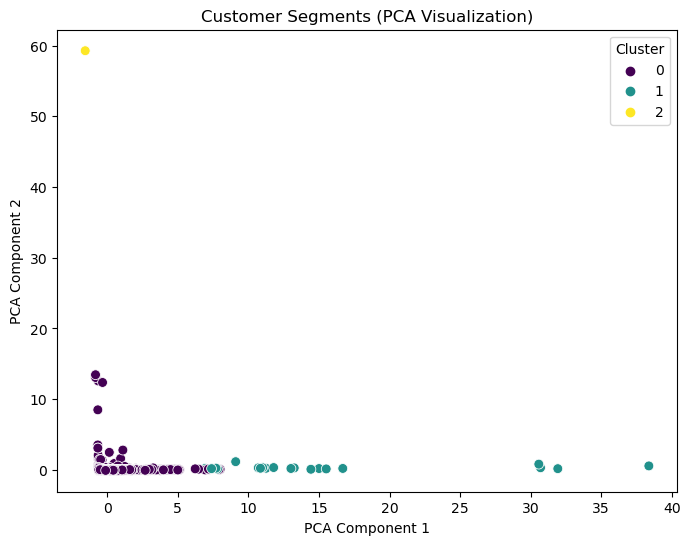

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=grouped['Cluster'], palette='viridis', s=50)
plt.title('Customer Segments (PCA Visualization)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [39]:
grouped.to_csv('customer_clusters.csv', index=True)
print("Customer segments saved to 'customer_clusters.csv'")

Customer segments saved to 'customer_clusters.csv'
